In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from scipy.optimize import fsolve

In [4]:
import pandas as pd

In [5]:
M0 = 1.1
Me = 3
g = 1.25
k = 3

In [6]:
wM = lambda M: np.degrees(k*np.arctan(np.sqrt(M**2-1)/k)-np.arctan(np.sqrt(M**2-1)))

In [7]:
Mw = lambda win: fsolve(lambda M: wM(M)-win, 2)[0]

In [8]:
Mw(59)

2.9838025063160498

In [9]:
wM(3)

59.412790609339858

In [10]:
Mw(wM(2))

2.0

In [11]:
thw = lambda Ip, Im: (0.5*(Ip+Im), 0.5*(Ip-Im))

In [12]:
Iminus_center = lambda incoming_Ip: -incoming_Ip
thw_center = lambda incoming_Ip: (0, incoming_Ip)

In [15]:
#th_0 = 0
#th_e = 0
#w_0 = w(M0)
#w_e = w(Me)
#Im_1 = th_0-w_0
#Ip_1 = th_0+w_0
#Ip_e = th_e+w_e

In [16]:
#_, Ip_5, Ip_8, Ip_10 = np.linspace(Ip_1, Ip_e, 4)

In [17]:
#th_2, w_2 = thw(Ip_5, Im_1)
#th_3, w_3 = thw(Ip_8, Im_1)
#th_4, w_4 = thw(Ip_10, Im_1)
#th_5, w_5 = thw_center(Ip_5)
#Im_5 = Iminus_center(Ip_5)
#th_6, w_6 = thw(Ip_8, Im_5)
#th_7, w_7 = thw(Ip_10,Im_5)
#th_8, w_8 = thw_center(Ip_8)
#Im_8 = Iminus_center(Ip_8)
#th_9, w_9 = thw(Ip_10, Im_8)
#th_10, w_10 = thw_center(Ip_10)

In [18]:
#th_9, w_9, th_10, w_10

### Pset

In [19]:
Me_pset = 4
discretization = 22
line_number = 6
th = np.empty(discretization)
w = np.empty(discretization)
th_0, th_e = 0,0
th[0] = th[1] = th_0
#th[-1] = th_e
w_0, w_e = wM(M0), wM(Me_pset)
w[0] = w[1] = w_0
#w[-1] = w_e
Im_1 = th_0-w_0
Ip_1 = th_0+w_0
Ip_e = th_e+w_e

## Part (a)

In [20]:
Ips = np.linspace(Ip_1, Ip_e, line_number)

In [21]:
display = lambda idx, th, w, opt="": print(idx, opt, w, th)

In [22]:
Im = Im_1
display(0, th[0], w[0])
display(1, th[1], w[1])
idx = 1
for Im_counter in range(line_number-1):
    idx +=1
    for counter, Ip_i in enumerate(Ips[Im_counter+1:]):
        th[idx], w[idx] = thw(Ip_i, Im)
        display(idx, th[idx], w[idx])
        idx +=1
    th[idx], w[idx] = thw_center(Ips[Im_counter+1])
    display(idx, th[idx], w[idx], "center")
    Im = Iminus_center(Ips[Im_counter+1])

0  1.43484446218 0.0
1  1.43484446218 0.0
2  9.41073806244 7.97589360026
3  17.3866316627 15.9517872005
4  25.362525263 23.9276808008
5  33.3384188632 31.9035744011
6  41.3143124635 39.8794680013
7 center 17.3866316627 0.0
8  25.362525263 7.97589360026
9  33.3384188632 15.9517872005
10  41.3143124635 23.9276808008
11  49.2902060638 31.9035744011
12 center 33.3384188632 0.0
13  41.3143124635 7.97589360026
14  49.2902060638 15.9517872005
15  57.266099664 23.9276808008
16 center 49.2902060638 0.0
17  57.266099664 7.97589360026
18  65.2419932643 15.9517872005
19 center 65.2419932643 0.0
20  73.2178868646 7.97589360026
21 center 81.1937804648 0.0


In [23]:
table = pd.DataFrame()
table["omegas"], table["thetas"] = w, th

In [24]:
table["M"] = table["omegas"].apply(Mw)
table["mu"] = table["M"].apply(lambda M: np.degrees(np.arctan(1/np.sqrt(M**2-1))))
table["th+mu"] = table["thetas"]+table["mu"]
table["th-mu"] = table["thetas"]-table["mu"]
table["I+"] = table["thetas"]+table["omegas"]
table["I-"] = table["thetas"]-table["omegas"]
table["P/Pc"] = table["M"].apply(lambda M: (1+(g-1)/2*M**2)**(-g/(g-1)))
table["alphas"] = -np.radians(table["th-mu"])
table["betas"] = np.radians(table["th+mu"])

In [25]:
table[["M", "I+", "I-", "omegas", "thetas", "mu", "th+mu", "th-mu", "P/Pc", "alphas", "betas"]]

,M,I+,I-,omegas,thetas,mu,th+mu,th-mu,P/Pc,alphas,betas
0,1.100000,1.434844,-1.434844,1.434844,0.000000,65.380023,65.380023,-65.380023,0.494483,1.141097,1.141097
1,1.100000,1.434844,-1.434844,1.434844,0.000000,65.380023,65.380023,-65.380023,0.494483,1.141097,1.141097
2,1.386455,17.386632,-1.434844,9.410738,7.975894,46.158937,54.134831,-38.183043,0.340720,0.666420,0.944831
3,1.626345,33.338419,-1.434844,17.386632,15.951787,37.942890,53.894677,-21.991103,0.239730,0.383817,0.940640
4,1.861247,49.290206,-1.434844,25.362525,23.927681,32.498265,56.425946,-8.570585,0.165471,0.149585,0.984819
5,2.101839,65.241993,-1.434844,33.338419,31.903574,28.409749,60.313323,3.493826,0.110979,-0.060979,1.052666
6,2.354392,81.193780,-1.434844,41.314312,39.879468,25.134084,65.013552,14.745384,0.071920,-0.257355,1.134701
7,1.626345,17.386632,-17.386632,17.386632,0.000000,37.942890,37.942890,-37.942890,0.239730,0.662228,0.662228
8,1.861247,33.338419,-17.386632,25.362525,7.975894,32.498265,40.474159,-24.522372,0.165471,0.427996,0.706407
9,2.101839,49.290206,-17.386632,33.338419,15.951787,28.409749,44.361536,-12.457962,0.110979,0.217432,0.774255


## Part (b)

In [62]:
upstreams = {
    1: [0, 22],
    2: [0, 1],
    3: [0, 2],
    4: [0, 3],
    5: [0, 4],
    6: [0, 5],
    7: [2, 1],
    8: [3, 7],
    9: [4, 8],
    10: [5, 9],
    11: [6, 10],
    12: [8, 7],
    13: [9, 12],
    14: [10, 13],
    15: [11, 14],
    16: [13, 12],
    17: [14, 16],
    18: [15, 17],
    19: [17, 16],
    20: [18, 19],
    21: [20, 19],
    23: [0,6],
    24: [23, 11],
    25: [24, 15],
    26: [25, 18],
    27: [26, 20],
    28: [27, 21]
}
onthewall = [1, 7, 12, 16, 19, 21]

In [63]:
x = np.empty(29)*np.nan
y = np.empty(29)*np.nan
x[0] = 0
y[0] = 1
x[22] = 0
y[22] = 0

In [64]:
def position(xa, ya, alpha, xb, yb, beta):
    xc = (ya-yb+xa*np.tan(alpha)+xb*np.tan(beta))/(np.tan(alpha)+np.tan(beta))
    yc = (yb*np.tan(alpha)+ya*np.tan(beta)+(xa-xb)*np.tan(alpha)*np.tan(beta))/(np.tan(alpha)+np.tan(beta))
    return xc, yc

In [65]:
def positionofidx(idx):
    upstream_plus_idx, upstream_minus_idx = upstreams[idx]
    if upstream_plus_idx == 0:
        upstream_theta_idx = idx
    else:
        upstream_theta_idx = upstream_plus_idx 
        
    #print(upstream_plus_idx, upstream_minus_idx)
    xa, ya = x[upstream_plus_idx], y[upstream_plus_idx]
    xb, yb = x[upstream_minus_idx], y[upstream_minus_idx]
     
    alpha_upstream = table["alphas"].iloc[upstream_theta_idx]
    alpha_idx = table["alphas"].iloc[idx]
    alpha = np.average([alpha_upstream, alpha_idx])

    isonwall = idx in onthewall
    if isonwall:
        xc,yc = position(xa, ya, alpha, xb, yb, 0)
    else:
        beta_upstream =  table["betas"].iloc[upstream_minus_idx]
        beta_idx = table["betas"].iloc[idx]
        beta = np.average([beta_upstream, beta_idx])
        #print(xa,ya,xb,yb, np.degrees(alpha), np.degrees(beta))
        xc,yc = position(xa, ya, alpha, xb, yb, beta)
        
    return xc, yc
    

In [66]:
x[1],y[1] = positionofidx(1)
x[1],y[1]

(0.4582575694955846, 0.0)

In [67]:
x[2],y[2] = positionofidx(2)
x[2],y[2]

(0.71392806761832162, 0.43853605332355811)

In [68]:
for idx in range(2,22):
    x[idx], y[idx] = positionofidx(idx)

In [73]:
np.array((x,y)).transpose()

array([[  0.        ,   1.        ],
       [  0.45825757,   0.        ],
       [  0.71392807,   0.43853605],
       [  0.86729773,   0.64974563],
       [  1.00560167,   0.84844509],
       [  1.14189109,   1.06971754],
       [  1.28000324,   1.33688646],
       [  1.27395893,   0.        ],
       [  1.65527968,   0.3110921 ],
       [  2.0344094 ,   0.65750174],
       [  2.44725183,   1.09577799],
       [  2.91542652,   1.68822157],
       [  2.28016059,   0.        ],
       [  2.96952862,   0.41029157],
       [  3.7968916 ,   1.00548878],
       [  4.83527003,   1.91341189],
       [  4.11046292,   0.        ],
       [  5.61593172,   0.70885533],
       [  7.69845909,   1.95937077],
       [  8.25548589,   0.        ],
       [ 12.28164861,   1.55000402],
       [ 20.02163784,   0.        ],
       [  0.        ,   0.        ],
       [  1.83909443,   2.53660218],
       [  4.88921164,   4.43539694],
       [  9.62759488,   6.53789871],
       [ 18.09983355,   8.95956058],
 

In [74]:
def wallpositions(idx):
    upstream_plus_idx, upstream_minus_idx = upstreams[idx]
    xa, ya = x[upstream_plus_idx], y[upstream_plus_idx]
    xb, yb = x[upstream_minus_idx], y[upstream_minus_idx]
    alpha_upstream = -np.radians(table["thetas"].iloc[upstream_minus_idx])
    beta_upstream = table["betas"].iloc[upstream_minus_idx]
    print(alpha_upstream, beta_upstream)
    xc, yc = position(xa, ya, alpha_upstream, xb, yb, beta_upstream)
    return xc, yc

In [75]:
wallidxs = range(23,29)

In [76]:
for idx in wallidxs:
    x[idx], y[idx] = wallpositions(idx)

-0.696028020567 1.13470054139
-0.556822416453 0.947776355336
-0.41761681234 0.767576817016
-0.278411208227 0.592378700196
-0.139205604113 0.421020500698
-0.0 0.252680255142


In [49]:
allwallidxs = [0] + wallidxs

In [51]:
y

array([  1.        ,   0.        ,   0.43853605,   0.64974563,
         0.84844509,   1.06971754,   1.33688646,   0.        ,
         0.3110921 ,   0.65750174,   1.09577799,   1.68822157,
         0.        ,   0.41029157,   1.00548878,   1.91341189,
         0.        ,   0.70885533,   1.95937077,   0.        ,
         1.55000402,   0.        ,   0.        ,   2.53660218,
         4.43539694,   6.53789871,   8.95956058,  11.14726267,  11.14726267])

In [43]:
%matplotlib notebook

<IPython.core.display.Javascript object>


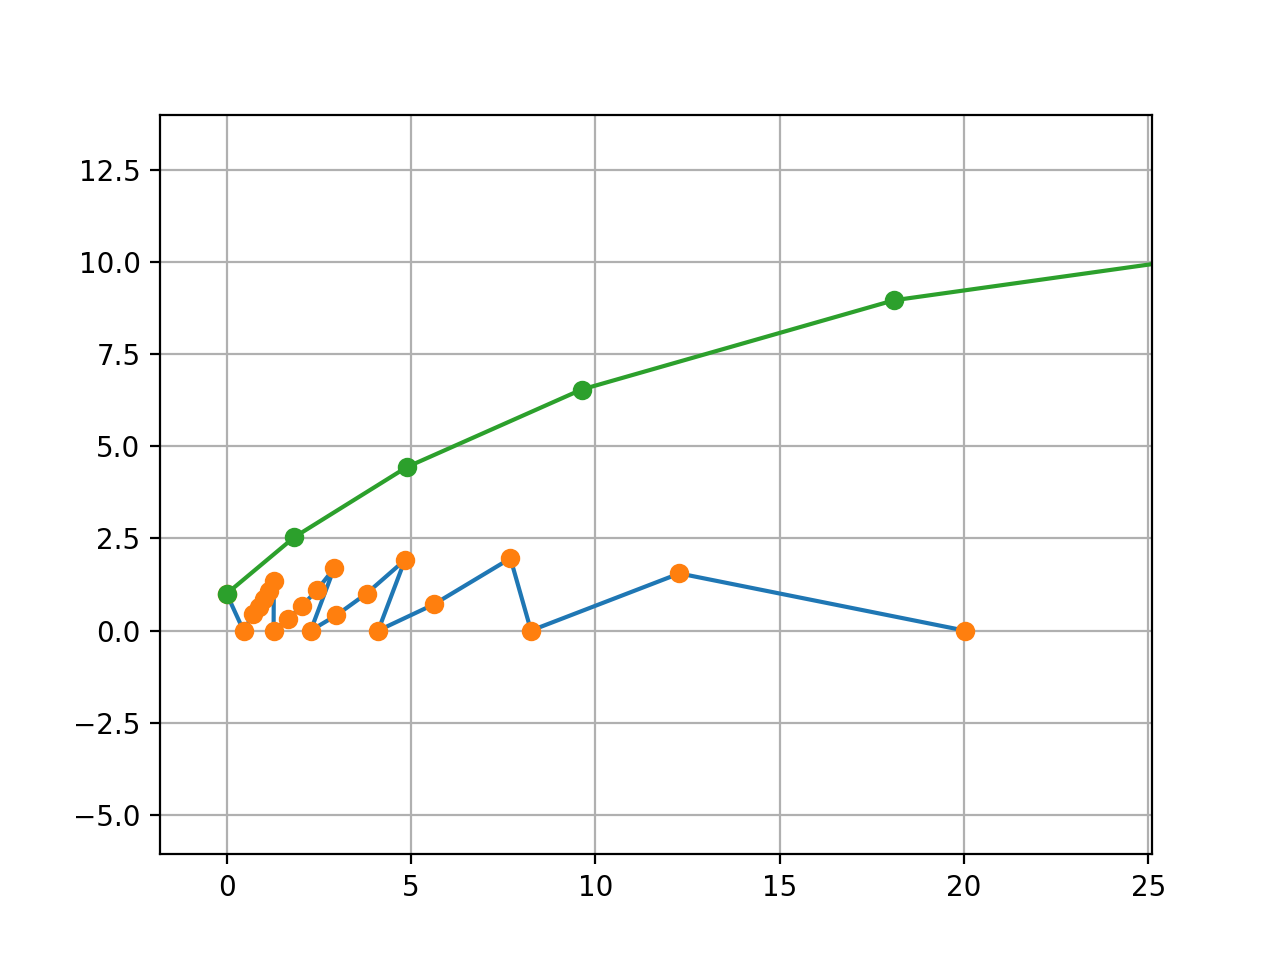

In [47]:
plt.plot(x[:22],y[:22])
plt.plot(x[:22],y[:22],'o')
plt.plot(x[[0]+wallidxs],y[[0]+wallidxs], 'o-')
plt.axis('equal')
plt.grid()

### Part (c)

In [82]:
isenT = lambda M: 1/(1+(g-1)/2*M**2)
isend = lambda M: isenT(M)**(1/(g-1))
Mratio = M0/Me_pset
Tratio = isenT(M0)/isenT(Me_pset)
uratio = Mratio*np.sqrt(Tratio)
dratio = isend(M0)/isend(Me_pset)
hanlyt = uratio*dratio

In [84]:
hanlyt

20.469863452751884

In [86]:
(M0/Me_pset)*((1+(g-1)/2*Me_pset**2)/(1+(g-1)/2*M0**2))**((g+1)/(2*(g-1)))

20.46986345275188

### Pressure

In [41]:
h = y[wallidxs]